In [101]:
import pandas as pd
import numpy as np
import datetime
import pylab as plt
from pyproj import Proj, transform
from matplotlib.colors import LogNorm

Note: will need pyproj installed to run

In [2]:
pc = pd.read_csv('Parking_Citations.csv')

/anaconda3/envs/condasc/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (0,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Database of parkin citations in Los Angeles. Maintained by city of LA (https://data.lacity.org/A-Well-Run-City/Parking-Citations/wjz9-h9np, FYI csv file as of January 15, 2019 is 1.13 GB, an api is also available)

In [3]:
pc

,Ticket number,Issue Date,Issue time,Meter Id,Marked Time,RP State Plate,Plate Expiry Date,VIN,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude
0,4272349605,12/30/2015,2201.0,NaN,NaN,CA,201605.0,NaN,OLDS,PA,GN,3069 SAN MARINO ST,00403,54.0,80.56E4+,RED ZONE,93.0,6.471841e+06,1.842350e+06
1,4272349616,12/30/2015,2205.0,NaN,NaN,CA,201508.0,NaN,HOND,PA,WT,2936 8TH ST W,00403,54.0,80.56E1,WHITE ZONE,58.0,6.473823e+06,1.843512e+06
2,4272821512,12/30/2015,1725.0,NaN,NaN,CA,10.0,NaN,TOYT,PA,SL,301 LAUREL AV N,00401,54.0,5204A-,DISPLAY OF TABS,25.0,6.451208e+06,1.850273e+06
3,4272821523,12/30/2015,1738.0,WF74,NaN,CA,2.0,NaN,RROV,PA,BK,8321 3RD ST W,00401,54.0,88.13B+,METER EXP.,63.0,6.449387e+06,1.849064e+06
4,4272821534,12/30/2015,1807.0,13,NaN,CA,1.0,NaN,FORD,PA,GN,121 CROFT AVE,00401,54.0,80.58L,PREFERENTIAL PARKING,68.0,6.448347e+06,1.849662e+06
5,4272889353,12/30/2015,514.0,NaN,NaN,CA,201605.0,NaN,DODG,PA,GY,4939 ECHO ST,00611,56.0,80.69BS,NO PARK/STREET CLEAN,73.0,9.999900e+04,9.999900e+04
6,4274301964,01/04/2016,1205.0,NaN,NaN,TX,NaN,NaN,OTHR,TR,WT,2650 12TH ST E,6T8,56.0,80.69B,NO PARKING,73.0,6.494776e+06,1.830623e+06
7,1112509506,12/21/2015,1255.0,NaN,NaN,CA,NaN,NaN,CIMC,TL,BL,PENNINGTON/I ST,1A27,4.0,000,80691a,NaN,9.999900e+04,9.999900e+04
8,1112509510,12/21/2015,1305.0,NaN,NaN,CA,NaN,NaN,CIMC,TL,BL,PENNINGTON/I ST,1A27,4.0,000,80691a,NaN,9.999900e+04,9.999900e+04
9,1112509926,12/21/2015,1340.0,NaN,NaN,TN,NaN,NaN,HYTR,TL,BK,CANNERY ST/WAY ST,L59,3.0,000,80691a,NaN,9.999900e+04,9.999900e+04


In [4]:
pc.describe()

,Issue time,Marked Time,Plate Expiry Date,Agency,Fine amount,Latitude,Longitude
count,8.732642e+06,290819.000000,7.939479e+06,8.734684e+06,8.728716e+06,8.735225e+06,8.735225e+06
mean,1.203859e+03,1055.398478,1.867923e+05,5.201023e+01,7.011322e+01,5.501828e+06,1.586843e+06
std,4.723192e+02,227.603582,5.274683e+04,9.299245e+00,3.211331e+01,3.003363e+06,2.064454e+06
min,0.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+01,9.999900e+04,9.999900e+04
25%,9.120000e+02,910.000000,2.016010e+05,5.100000e+01,6.300000e+01,6.421516e+06,1.821571e+06
50%,1.155000e+03,1035.000000,2.017020e+05,5.400000e+01,6.800000e+01,6.451546e+06,1.841992e+06
75%,1.511000e+03,1200.000000,2.018030e+05,5.500000e+01,7.300000e+01,6.475013e+06,1.858207e+06
max,2.359000e+03,2400.000000,8.201080e+05,9.700000e+01,5.050000e+02,4.042322e+09,4.042322e+09


In [5]:
pc.isnull().sum()/87352.28

Ticket number             0.000000
Issue Date                0.006125
Issue time                0.029604
Meter Id                 73.992825
Marked Time              96.670734
RP State Plate            0.008758
Plate Expiry Date         9.109653
VIN                      99.813296
Make                      0.100329
Body Style                0.101829
Color                     0.047142
Location                  0.009777
Route                     0.748338
Agency                    0.006228
Violation code            0.000000
Violation Description     0.010005
Fine amount               0.074549
Latitude                  0.000034
Longitude                 0.000034
dtype: float64

Meter Id, Marked Time, and VIN are mostly nan's, get rid of them for the rest of the analysis

Note: Plate Expiry Date is 9% nans

In [6]:
pc.drop(columns=['Meter Id','Marked Time','VIN'],inplace=True)

In [7]:
pc['RP State Plate'].describe()

count     8734463
unique         78
top            CA
freq      8136507
Name: RP State Plate, dtype: object

In [8]:
pc['RP State Plate'].unique()

array(['CA', 'TX', 'TN', 'IL', 'AZ', 'NV', 'FL', 'IN', 'OR', 'MO', 'UT',
       'WA', 'NY', 'NM', 'GA', 'CO', 'MN', 'LA', 'NC', 'MT', 'IA', 'MA',
       'VI', 'SC', 'WI', 'ID', 'VA', 'DC', 'US', 'PA', 'CT', 'MI', 'HI',
       'AK', 'NE', 'NJ', 'MD', 'BC', 'MX', 'OH', 'OK', 'WV', 'KY', 'KS',
       'VT', 'AR', 'ME', 'ON', 'AL', 'ND', 'WY', 'MS', 'SA', 'CZ', 'NH',
       'QU', 'AB', 'RI', 'CN', nan, 'SD', 'FN', 'NB', 'DD', 'DE', 'MB',
       'XX', 'PE', 'NS', 'PR', 'TT', 'AS', 'YU', 'GU', 'NF', 'NW', '|',
       'VN', 'ML'], dtype=object)

In [71]:
pc[pc['RP State Plate']=='XX']

,Ticket number,Issue Date,Issue time,RP State Plate,Plate Expiry Date,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude
59544,1112139840,01/05/2016,2309.0,XX,201612.0,MAZD,PA,GY,500 WORLD WAY U/L,3C11B,2.0,8939,WHITE CURB,58.0,6.439868e+06,1.802687e+06
88861,1111380992,01/13/2016,821.0,XX,NaN,CHEV,PA,OR,5123 E BALTIMORE ST,00675,56.0,8069BS,NO PARK/STREET CLEAN,73.0,9.999900e+04,9.999900e+04
116639,1113044483,01/19/2016,1519.0,XX,201701.0,MAZD,PA,GY,712 N LA BREA AVE,00487,54.0,8813B,METER EXPIRED,63.0,6.457489e+06,1.853004e+06
182390,1113047110,01/29/2016,117.0,XX,201602.0,NISS,PA,BL,1718 N VINE ST,00402,54.0,8069B,NO PARKING,73.0,6.462770e+06,1.859667e+06
182545,1113868420,01/28/2016,1016.0,XX,201612.0,JEEP,PA,BK,3425 MOTOR AVE,00141,51.0,8069BS,NO PARK/STREET CLEAN,73.0,6.437656e+06,1.832598e+06
227697,1108964850,02/05/2016,1600.0,XX,201609.0,TOYO,PA,GR,7320 1/2 MELROSE ST,00472,54.0,8056E4,RED ZONE,93.0,9.999900e+04,9.999900e+04
245439,1113978132,02/05/2016,836.0,XX,NaN,ITAL,SC,WH,451 S BARRINGTON AV,00157,51.0,8069BS,NO PARK/STREET CLEAN,73.0,9.999900e+04,9.999900e+04
394635,1114105042,02/29/2016,2230.0,XX,201609.0,NISS,PA,GY,7080 MULHOLLAND DR,6A31,1.0,8069AP,NO STOP/STAND PM,93.0,6.457017e+06,1.865430e+06
400767,1114046640,03/02/2016,1021.0,XX,201608.0,AUDI,PA,BK,10726 WESTMINSTER AV,00146,51.0,8069BS,NO PARK/STREET CLEAN,73.0,6.436938e+06,1.831235e+06
470927,1109258021,03/16/2016,844.0,XX,201608.0,MAZD,PA,RE,4200 W CAMERO AV,00445,54.0,8069B,NO PARKING,73.0,9.999900e+04,9.999900e+04


In [9]:
pc['RP State Plate'].value_counts().nlargest(10)

CA    8136507
AZ      77719
TX      55407
NV      52000
FL      37965
WA      34614
IL      25018
OR      24325
CO      22188
NY      16278
Name: RP State Plate, dtype: int64

No surprise that the huge majority of parking citations are attributed to cars with CA registration. Also not surprising that other Southwest states like AZ, NV, WA, CO, and OR make the top 10. I am surprised by TX, FL, IL, and NY. I wonder how much of this is due to tourism or perhaps LA residents keeping out-of-state car registration. Or if this is potentially hinting at a correlation between likelihood of a parking citation recieved and a driver's home state (which would not be able to be determined using this dataset alone).

In [10]:
pc.Make.value_counts().nlargest(10)

TOYT    1446520
HOND     984273
FORD     764388
NISS     623475
CHEV     595635
BMW      398878
MERZ     355328
VOLK     299332
HYUN     268643
DODG     255657
Name: Make, dtype: int64

A quick google search shows Toyota and Honda being the most popular car brands in CA/LA. One or more other datasets would be needed to investigate any potential correlation between car make and number of parking citations.

In [11]:
pc['Body Style'].value_counts().nlargest(10)

PA    7682211
PU     299226
VN     233707
TK     213447
CM     140399
TR      58121
MC      27574
SU      22292
MH      21134
OT      10287
Name: Body Style, dtype: int64

In [12]:
pc.Color.value_counts().nlargest(10)

BK    1882054
WT    1811921
GY    1693801
SL    1093785
BL     679478
RD     433153
GN     250499
BN     172211
GO     114695
MR     104976
Name: Color, dtype: int64

Black, white, gray, silver, blue, red, green, brown, and gold, in that order. Not sure what MR stands for (maroon? marine blue?)

In [13]:
pc.Route.value_counts().nlargest(10)

00600    516301
00500    364125
00402    174827
00401    170123
00403    131882
00315    112925
00111    108458
00107     99391
00309     88811
00400     82906
Name: Route, dtype: int64

In [14]:
pc.Agency.value_counts().nlargest(5)

54.0    2153146
51.0    1945563
56.0    1848562
53.0    1572839
55.0     877114
Name: Agency, dtype: int64

DOT-Hollywood, DOT-Western, DOT-Central, DOT-Valley, and DOT-Southern in that order (from attachment provided along with the database)

In [15]:
pc['Violation code'].value_counts().nlargest(10)

80.69BS     2441952
88.13B+     1525767
80.56E4+     607202
80.58L       600147
5204A-       536348
80.69B       371293
80.69C       291187
5200         239811
80.56E1      189231
80.69AP+     157402
Name: Violation code, dtype: int64

In [16]:
pc['Violation Description'].value_counts().nlargest(10)

NO PARK/STREET CLEAN      2532877
METER EXP.                1525767
RED ZONE                   647068
PREFERENTIAL PARKING       600147
DISPLAY OF TABS            536348
NO PARKING                 390608
DISPLAY OF PLATES          239811
WHITE ZONE                 195240
NO STOP/STANDING           157402
PARKED OVER TIME LIMIT     154424
Name: Violation Description, dtype: int64

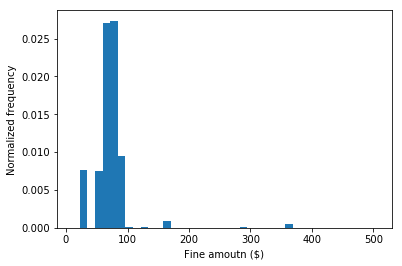

In [17]:
hist,bins,junk=plt.hist(pc['Fine amount'].dropna(),bins=40,normed=1)
plt.xlabel('Fine amoutn ($)')
plt.ylabel('Normalized frequency')

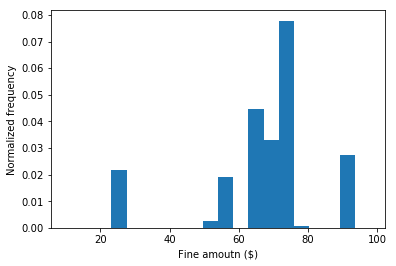

In [18]:
hist,bins,junk=plt.hist(pc[pc['Fine amount'] < 100]['Fine amount'].dropna(),bins=20,normed=1)
plt.xlabel('Fine amoutn ($)')
plt.ylabel('Normalized frequency')

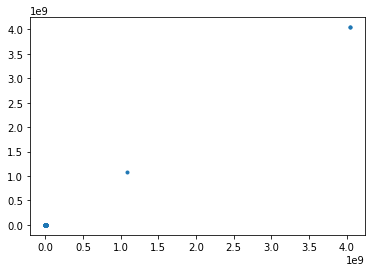

In [19]:
latlon = pc[['Latitude','Longitude']].dropna()
plt.plot(latlon['Latitude'],latlon['Longitude'],'.')

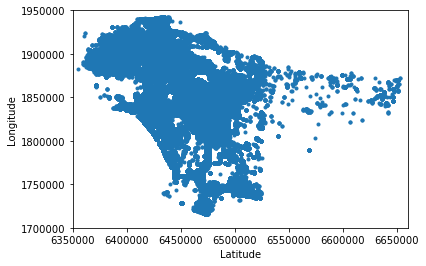

In [20]:
plt.plot(latlon['Latitude'],latlon['Longitude'],'.')
plt.xlim([6.35e6,6.66e6])
plt.ylim([1.7e6,1.95e6])
plt.xlabel('Latitude')
plt.ylabel('Longitude')

The coast line is clearly visible. One can also see the general shape of the Torrance and Long Beach area.

In [21]:
latlon[latlon.Latitude < 6.274e6].describe()

,Latitude,Longitude
count,1312319.0,1312319.0
mean,99999.0,99999.0
std,0.0,0.0
min,99999.0,99999.0
25%,99999.0,99999.0
50%,99999.0,99999.0
75%,99999.0,99999.0
max,99999.0,99999.0


In [22]:
latlon[latlon.Latitude > 6.7e6].describe()

,Latitude,Longitude
count,3.000000e+00,3.000000e+00
mean,3.054199e+09,3.054199e+09
std,1.711480e+09,1.711480e+09
min,1.077953e+09,1.077953e+09
25%,2.560137e+09,2.560137e+09
50%,4.042322e+09,4.042322e+09
75%,4.042322e+09,4.042322e+09
max,4.042322e+09,4.042322e+09


Only 3 points, will just ignore

In [23]:
pc[pc.Latitude==99999.0]

,Ticket number,Issue Date,Issue time,RP State Plate,Plate Expiry Date,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude
5,4272889353,12/30/2015,514.0,CA,201605.0,DODG,PA,GY,4939 ECHO ST,00611,56.0,80.69BS,NO PARK/STREET CLEAN,73.0,99999.0,99999.0
7,1112509506,12/21/2015,1255.0,CA,NaN,CIMC,TL,BL,PENNINGTON/I ST,1A27,4.0,000,80691a,NaN,99999.0,99999.0
8,1112509510,12/21/2015,1305.0,CA,NaN,CIMC,TL,BL,PENNINGTON/I ST,1A27,4.0,000,80691a,NaN,99999.0,99999.0
9,1112509926,12/21/2015,1340.0,TN,NaN,HYTR,TL,BK,CANNERY ST/WAY ST,L59,3.0,000,80691a,NaN,99999.0,99999.0
10,1112510291,12/25/2015,1255.0,CA,201606.0,HOND,NaN,SI,2500 NAVY WAY,M71,3.0,000,8709b,NaN,99999.0,99999.0
12,1112510313,12/25/2015,1300.0,IL,NaN,MAZD,NaN,SI,2500 NAVY WAY,M71,3.0,000,8709b,NaN,99999.0,99999.0
13,1112510324,12/25/2015,1255.0,CA,201608.0,FORD,PA,BK,2500 NAVY WAY,M71,3.0,000,8709b,NaN,99999.0,99999.0
14,4273708876,01/05/2016,1426.0,CA,NaN,CHEV,PA,GO,5202 YORK BLVD,00672,56.0,80.56E4+,RED ZONE,93.0,99999.0,99999.0
15,1107638431,12/29/2015,1040.0,CA,201512.0,INTL,TR,BL,CERES N/O 8TH,MQ39,1.0,013,22500H,68.0,99999.0,99999.0
16,1109081116,12/21/2015,1215.0,AZ,NaN,BMW,PA,CR,WESTERN CYN,NaN,4.0,8049,WRG SD/NOT PRL,63.0,99999.0,99999.0


Need part in regards to these where the latitude and longitude did not get recorded properly, would be to use Google Maps geocoding api. Unfortunately, it would cost 300 USD just to search 100k of these addresses (this includes the 200 USD credit/month).

Another option, geopy, has a rate limit of 1 request/second. Thus, it would take over 15 days to search for the lat and long of all 1.3M+ entries where it is incorrectly recorded.

In [34]:
inProj = Proj(init='epsg:2229', preserve_units = True)
outProj = Proj(init='epsg:4326')
x1,y1 = 6.471841e+06,1.842350e+06
y2,x2 = transform(inProj,outProj,x1,y1)
print x2,y2

34.0545047168 -118.29654874


Searched for the right epsg (http://prj2epsg.org/search) and then some trial an error with this test case.

Address: 3069 San Marino St, Lat and Long: 34.0545064,-118.29658119999999 (https://www.gps-coordinates.net/)

=> Consistent to 4 decimal places

In [35]:
x1, y1 = 6.475427e+06, 1.811860e+06
y2,x2 = transform(inProj,outProj,x1,y1)
print x2,y2

33.9707514621 -118.284425226


From google: 33.9706003,-118.2847329, okay, consistent within 3 decimal point

In [39]:
latlon = pc[pc.Latitude < 1e7][['Latitude','Longitude']].dropna()

(6.35, 6.65)

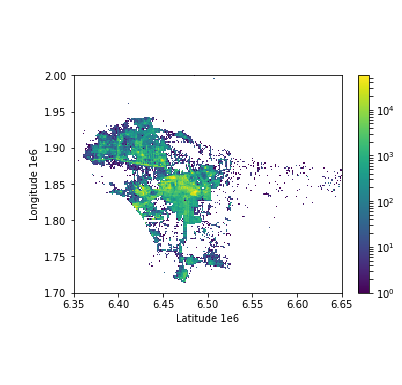

In [59]:
plt.hist2d(latlon[latlon.Latitude > 1e5].Latitude/1e6,latlon[latlon.Latitude > 1e5].Longitude/1e6,bins=300,
           norm=LogNorm())
plt.colorbar()
plt.xlabel('Latitude 1e6')
plt.ylabel('Longitude 1e6')
plt.ylim([1.7,2.0])
plt.xlim([6.35,6.65])

In [79]:
use_param = ['Issue Date','Issue time','Latitude','Longitude']
use_pc = pc[(pc.Latitude > 99999.0) & (pc.Latitude < 1e7)][use_param]
use_pc

,Issue Date,Issue time,Latitude,Longitude
0,12/30/2015,2201.0,6.471841e+06,1.842350e+06
1,12/30/2015,2205.0,6.473823e+06,1.843512e+06
2,12/30/2015,1725.0,6.451208e+06,1.850273e+06
3,12/30/2015,1738.0,6.449387e+06,1.849064e+06
4,12/30/2015,1807.0,6.448347e+06,1.849662e+06
6,01/04/2016,1205.0,6.494776e+06,1.830623e+06
11,12/30/2015,1805.0,6.473985e+06,1.858570e+06
21,12/30/2015,1924.0,6.457156e+06,1.853174e+06
22,12/30/2015,1931.0,6.456089e+06,1.848716e+06
24,12/30/2015,1224.0,6.433118e+06,1.830581e+06


In [80]:
use_pc.isnull().sum()

Issue Date       0
Issue time    1228
Latitude         0
Longitude        0
dtype: int64

In [89]:
use_pc['Issue Date'] = pd.to_datetime(use_pc['Issue Date'])

In [91]:
use_pc['Issue Date'].describe()

count                 7422903
unique                   1691
top       2018-01-02 00:00:00
freq                     8759
first     2010-02-03 00:00:00
last      2019-01-13 00:00:00
Name: Issue Date, dtype: object

(array([  317506.,   184131.,   158772.,  1387487.,  1623871.,  1513421.,
          863787.,   633288.,   459267.,   280145.]),
 array([    0. ,   235.9,   471.8,   707.7,   943.6,  1179.5,  1415.4,
         1651.3,  1887.2,  2123.1,  2359. ]),
 <a list of 10 Patch objects>)

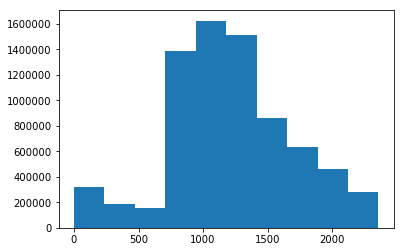

In [96]:
plt.hist(use_pc['Issue time'].dropna())

/anaconda3/envs/condasc/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  This is separate from the ipykernel package so we can avoid doing imports until


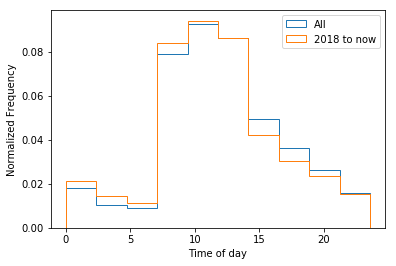

In [109]:
lowL=datetime.date(2018,1,1)
plt.hist(use_pc['Issue time'].dropna()/100.0,histtype='step',label='All',normed=1)
plt.hist(use_pc[use_pc['Issue Date'] > lowL]['Issue time'].dropna()/100.0,histtype='step',label='2018 to now',normed=1)
plt.xlabel('Time of day')
plt.ylabel('Normalized Frequency')
plt.legend()

In [112]:
len(use_pc[use_pc['Issue time'] < 1200]['Issue time']),len(use_pc[use_pc['Issue time'] > 1200]['Issue time'])

(3671767, 3740742)

While there the peak time for parking citations to be issued is 10am +/- ~2hrs, approximately half of all citations are issues in the am and the other half in the pm. And this does not appear to change across the time parking citations have been recorded in this database.

In [125]:
for i in range(10):
    b_ts = pd.Timestamp(2010+i,1,1)
    e_ts = pd.Timestamp(2011+i,1,1)
    tmp_num = len(use_pc[(use_pc['Issue Date'] >= b_ts) & (use_pc['Issue Date'] < e_ts)])
    
    print('Num pc in '+str(2010+i)+': '+str(tmp_num))

Num pc in 2010: 17
Num pc in 2011: 12
Num pc in 2012: 37
Num pc in 2013: 38
Num pc in 2014: 34205
Num pc in 2015: 1542795
Num pc in 2016: 1864007
Num pc in 2017: 2154786
Num pc in 2018: 1771958
Num pc in 2019: 55048


That's within January 13th of 2019.

Seems to be a peak in 2017

In [ ]:
tmp_dt = pd.to_datetime(pc['Issue Date'].dropna())